## Обробка та аналіз БМД

**Лабораторна робота №5**  
виконала студентка групи БС-81  
Соловйова Анастасія

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [2]:
data = pd.read_csv('netflix_titles.csv')
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [3]:
new_data = ["Movie","TV Show"]
df = pd.DataFrame(columns=new_data)
movie1 = 0; movie2 = 0; movie3 = 0; movie4 = 0; show1 = 0; show2 = 0; show3 = 0; show4 = 0

n = data.shape[0]

for i in range(n): 
    if "Movie" == data["type"][i]:
        if (data['release_year'][i] <= 2005):
            movie1+= 1
        elif ((data['release_year'][i] > 2005) & (data['release_year'][i] <= 2010)):
            movie2 += 1
        elif ((data['release_year'][i] > 2010) & (data['release_year'][i] <= 2015)):
            movie3 += 1
        else:
            movie4 += 1   
    elif ("TV Show" == data["type"][i]):
        if (data['release_year'][i] <= 2005):
            show1 += 1
        elif ((data['release_year'][i] > 2005) & (data['release_year'][i] <= 2010)):
            show2 += 1
        elif ((data['release_year'][i] > 2010) & (data['release_year'][i] <= 2015)):
            show3 += 1
        else:
            show4 += 1
            
df = pd.DataFrame({"Movie": pd.Series([movie1,movie2,movie3,movie4], index = ["before 2005","between 2005-2010","between 2010-2015","between 2015-2020"]),
                  "TV Show": pd.Series([show1,show2,show3,show4], index = ["before 2005","between 2005-2010","between 2010-2015","between 2015-2020"])})
df

,Movie,TV Show
before 2005,556,81
between 2005-2010,404,112
between 2010-2015,978,383
between 2015-2020,2327,1393


2. Побудувати графік, що відображає розподіл ознак в групах.

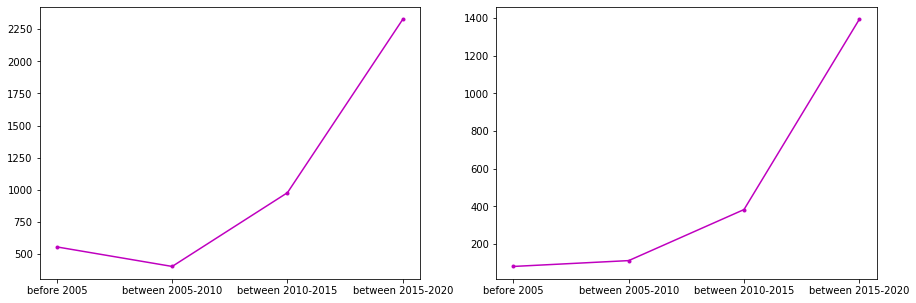

In [4]:
fig = plt.subplots(1,2,figsize = (15,5))

plt.subplot(1, 2, 1)
plt.plot(df.index, df['Movie'], marker='.', color='m')

plt.subplot(1, 2, 2)
plt.plot(df.index, df['TV Show'], marker='.', color='m')

3.Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,001 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [6]:
def Pirson(significant_level, datareal, dataexpected):
   
    if not abs(sum(datareal) - sum(dataexpected)) < 0.000001:
        dataexpected = dataexpected / sum(dataexpected) * sum(datareal)
        
    PTable = pd.read_excel('PirsonTable.xlsx')
    PTable = PTable.loc[1:, :]
    PTable = PTable.rename(columns={"Unnamed: 0": "Level", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    PTable.set_index("Level", inplace=True)
    
    chi_squared = sum([ (x_r - x_exp)**2 / x_exp for
                  x_r, x_exp in zip(datareal, dataexpected)])
    
    r = len(datareal) - 1
    
    check_value = PTable.loc[r, significant_level]
    return check_value < chi_squared

PTable = pd.read_excel('PirsonTable.xlsx')

4.Перевірити розбіжність на між групами на даних з п. 1. В результаті сформувати таблицю спряженості

In [7]:
df.insert(1, 'Movie %',
                     (np.array([x for x in df['Movie']]) / df['Movie'].sum() * 100))
df.insert(3, 'TV Show %',
                    (np.array([x for x in df['TV Show']]) / df['TV Show'].sum() * 100))
df

,Movie,Movie %,TV Show,TV Show %
before 2005,556,13.036342,81,4.113763
between 2005-2010,404,9.472450,112,5.688167
between 2010-2015,978,22.930832,383,19.451498
between 2015-2020,2327,54.560375,1393,70.746572


Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)

In [9]:
significant_01 = Pirson(0.01, df['Movie'], df['TV Show'] )
significant_05 = Pirson(0.05, df['Movie'], df['TV Show'] )

result = pd.DataFrame ( 
    [significant_01, significant_05],
    columns = ["Статистична розбіжність"],
    index = ['0.01', '0.05'])

result.index.name = 'Рівень значимості'
result

,Статистична розбіжність
Рівень значимості,
0.01,True
0.05,True


### Висновок ###
Порівнюючи дві групи за розподіленням ознаки з допомогою розрахунку критерію Пірсона було отримано результат, що довзволяє припустити статистично значиму розбіжність між групами як на рівні значимості 0.05, так і 0.01.
